                                                     TOPKAPI UNİVERSİTESİ

                                               MAKİNE ÖĞRENMESİ-Ara sınav Ödevi

Öğrenci Adı ve Soyadı : Esra Betül ÖZCAN  
Öğrenci Numarası : 20040301022  
Bölümü : Yazılım Mühendisliği  


VERİ SETİNİN TANIMI : 
Pima Kızılderilileri Diyabet Veri Seti, Pima Kızılderilileri'nin tıbbi detayları verildiğinde 5 yıl içinde diyabet başlangıcını tahmin etmeyi içerir.  

Bu, ikili (2-sınıflı) bir sınıflandırma problemidir. Her sınıf için gözlemler dengeli değildir. 8 giriş değişkeni ve 1 çıkış değişkeni bulunmaktadır. Eksik değerlerin sıfır değerleriyle kodlandığı düşünülmektedir. Değişken isimleri şunlardır:  

Hamile kalma sayısı.  
Bir oral glukoz tolerans testinde 2 saatlik plazma glukoz konsantrasyonu.  
Diyastolik kan basıncı (mm Hg).  
Triceps cilt kıvrım kalınlığı (mm).  
2 Saatlik serum insulin (mu U/ml).  
Vücut kitle indeksi (kg/(boyunda m^2)).  
Diyabet soyağacı fonksiyonu.  
Yaş (yıl).  
Sınıf değişkeni (0 veya 1).  

1. SORU :   
Veri setine tüm algoritmalar için normalizasyon yöntemlerinden birini  uygulayınız. 

In [111]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.metrics import mean_squared_error, accuracy_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.naive_bayes import GaussianNB
from sklearn.datasets import load_iris
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.metrics import confusion_matrix, roc_curve, auc

Tüm normalizasyon değerlerini karşılaştırmak için ilk olarak Z-Score normalizasyonunu hesaplıyoruz.

In [76]:
# Veri setini okuyalım
veri = pd.read_csv("veri1.csv")

In [77]:
# Veri  setimdeki sutunlar
sutunlar = veri.columns
print(sutunlar)

Index(['Number of times pregnant',
       'Plasma glucose concentration a 2 hours in an oral glucose tolerance test',
       'Diastolic blood pressure (mm Hg)', 'Triceps skinfold thickness (mm)',
       '2-Hour serum insulin (mu U/ml)',
       'Body mass index (weight in kg/(height in m)^2)',
       'Diabetes pedigree function', 'Age (years)', 'Class variable (0 or 1)'],
      dtype='object')


In [78]:
# Z-Score normalizasyonunu hesapladım
z_score_normalized_veri = (veri - veri.mean()) / veri.std()

In [79]:
# Normalizasyon uygulanan veriyi gösterdim
print(z_score_normalized_veri)

     Number of times pregnant  \
0                    0.639530   
1                   -0.844335   
2                    1.233077   
3                   -0.844335   
4                   -1.141108   
..                        ...   
763                  1.826623   
764                 -0.547562   
765                  0.342757   
766                 -0.844335   
767                 -0.844335   

     Plasma glucose concentration a 2 hours in an oral glucose tolerance test  \
0                                             0.847771                          
1                                            -1.122665                          
2                                             1.942458                          
3                                            -0.997558                          
4                                             0.503727                          
..                                                 ...                          
763                                 

In [80]:
# Min-Max normalizasyonunu hesapladım
min_max_normalized_veri = (veri - veri.min()) / (veri.max() - veri.min())

In [81]:
# Normalizasyon uygulanan veriyi gösterdim
print(min_max_normalized_veri)

     Number of times pregnant  \
0                    0.352941   
1                    0.058824   
2                    0.470588   
3                    0.058824   
4                    0.000000   
..                        ...   
763                  0.588235   
764                  0.117647   
765                  0.294118   
766                  0.058824   
767                  0.058824   

     Plasma glucose concentration a 2 hours in an oral glucose tolerance test  \
0                                             0.743719                          
1                                             0.427136                          
2                                             0.919598                          
3                                             0.447236                          
4                                             0.688442                          
..                                                 ...                          
763                                 

Medyan normalizasyonunu uygulayalım.

In [82]:
# Medyan değerlerini hesapladım
medyanlar = veri.median()

In [83]:
# Medyan normalizasyonunu uyguladım
medyan_normalized_veri = veri / medyanlar

In [84]:
# Normalizasyon uygulanan veriyi gösterdim
print(medyan_normalized_veri)

     Number of times pregnant  \
0                    2.000000   
1                    0.333333   
2                    2.666667   
3                    0.333333   
4                    0.000000   
..                        ...   
763                  3.333333   
764                  0.666667   
765                  1.666667   
766                  0.333333   
767                  0.333333   

     Plasma glucose concentration a 2 hours in an oral glucose tolerance test  \
0                                             1.264957                          
1                                             0.726496                          
2                                             1.564103                          
3                                             0.760684                          
4                                             1.170940                          
..                                                 ...                          
763                                 

Sigmoid Normalizasyonu uygulayalım.

In [85]:
# Sigmoid normalizasyonunu uyguladım
sigmoid_normalized_veri = 1 / (1 + np.exp(-veri))

In [86]:
# Normalizasyon uygulanan veriyi gösterdim
print(sigmoid_normalized_veri)

     Number of times pregnant  \
0                    0.997527   
1                    0.731059   
2                    0.999665   
3                    0.731059   
4                    0.500000   
..                        ...   
763                  0.999955   
764                  0.880797   
765                  0.993307   
766                  0.731059   
767                  0.731059   

     Plasma glucose concentration a 2 hours in an oral glucose tolerance test  \
0                                                  1.0                          
1                                                  1.0                          
2                                                  1.0                          
3                                                  1.0                          
4                                                  1.0                          
..                                                 ...                          
763                                 

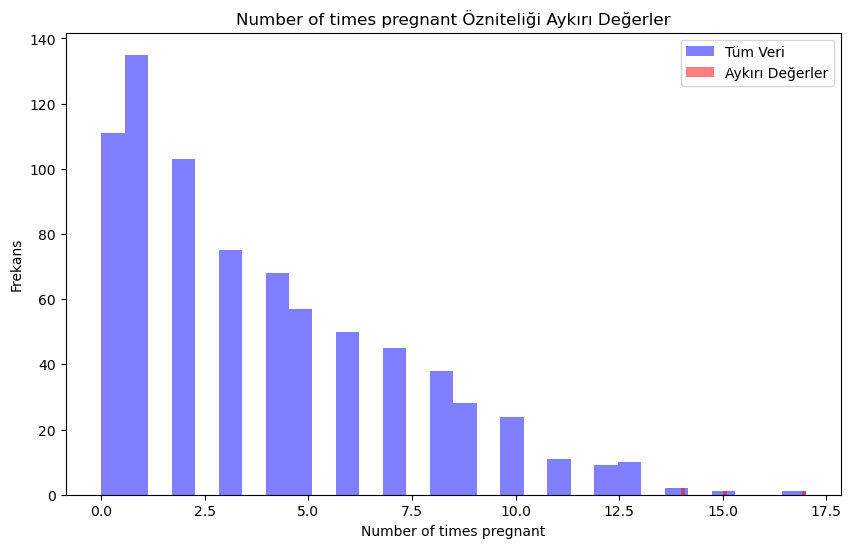

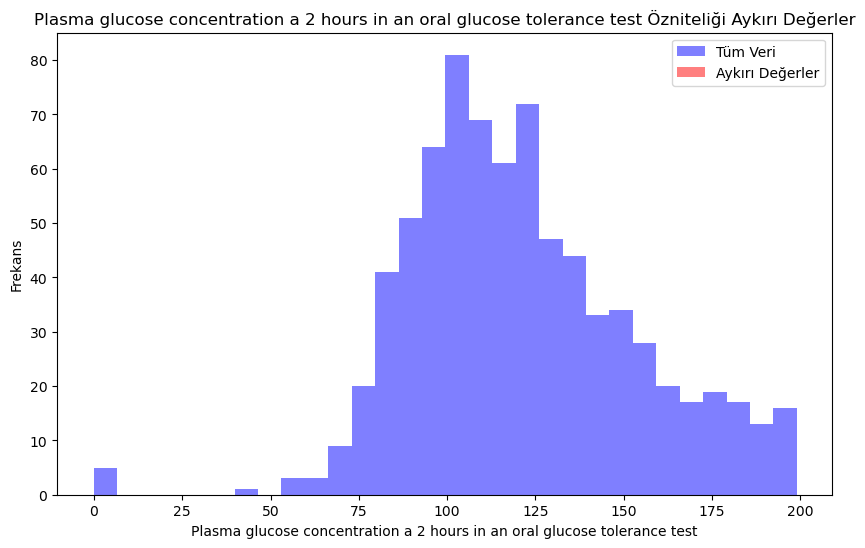

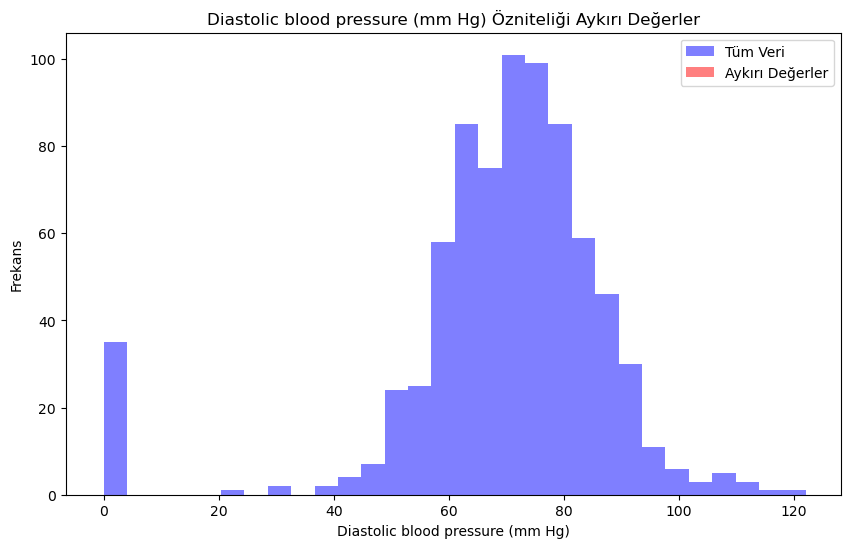

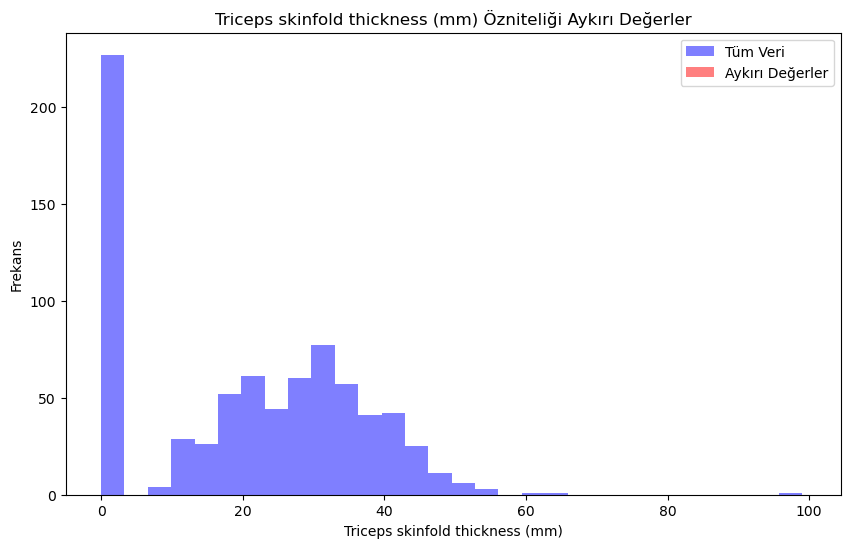

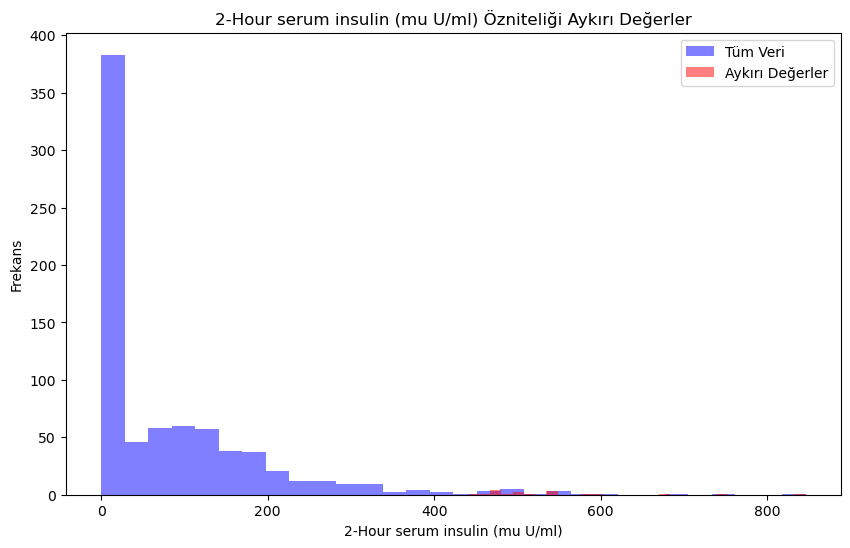

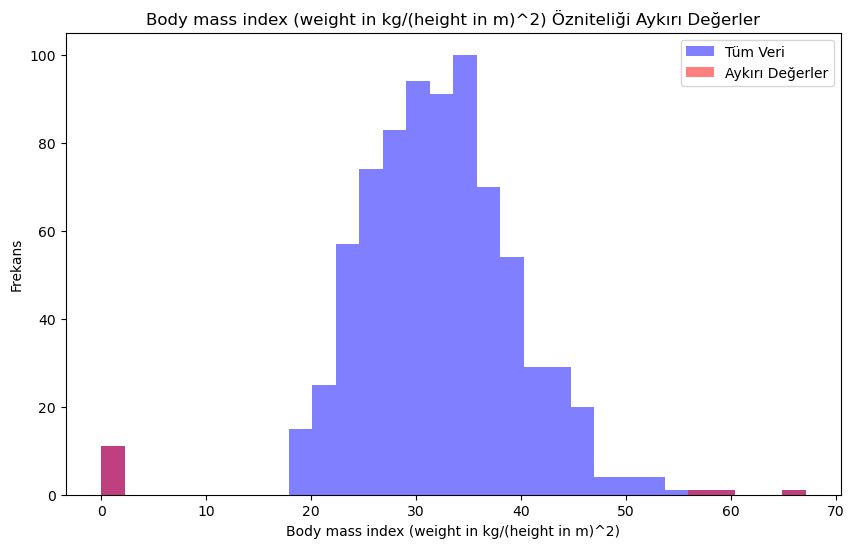

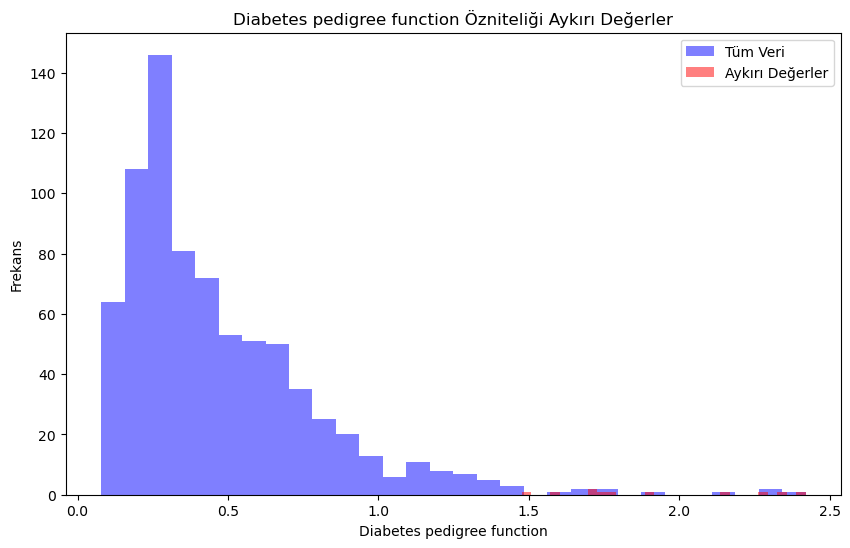

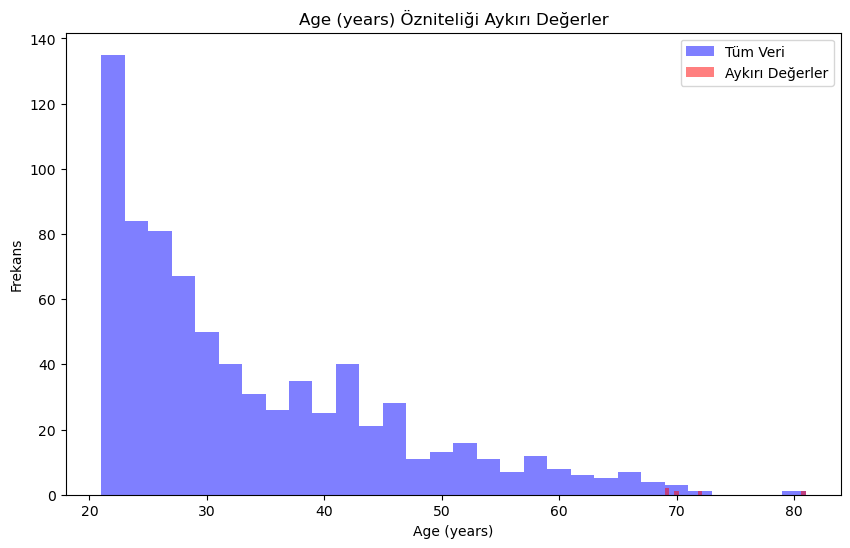

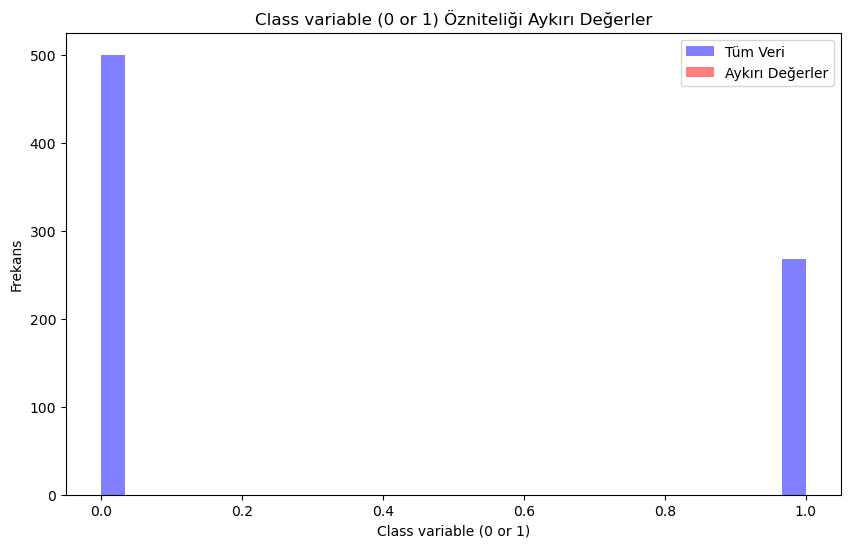

In [87]:
# Veri setindeki her bir öznitelik için Z-score hesaplamadım
z_scores = (veri - veri.mean()) / veri.std()

# Z-score değerlerini kullanarak aykırı değerleri belirlemedim
aykiri_degerler = (z_scores > 3) | (z_scores < -3)

# Her bir özniteliğin aykırı değerlerini görselleştirme işlemi yaptım
for column in veri.columns:
    plt.figure(figsize=(10, 6))
    plt.hist(veri[column], bins=30, color='blue', alpha=0.5, label='Tüm Veri')
    plt.hist(veri[column][aykiri_degerler[column]], bins=30, color='red', alpha=0.5, label='Aykırı Değerler')
    plt.title(f'{column} Özniteliği Aykırı Değerler')
    plt.xlabel(column)
    plt.ylabel('Frekans')
    plt.legend()
    plt.show()

"Sigmoid normalizasyonu, verileri [0, 1] aralığına sıkıştırmak için sigmoid fonksiyonunu kullanır. Bu yöntem, Min-Max normalizasyonundan farklı olarak, verilerin dağılımını düzeltmek için daha esnek bir şekilde uygulanabilir. Sigmoid normalizasyonu, özellikle aykırı değerlerin olduğu durumlarda daha iyi bir performans gösterebilir, çünkü aykırı değerlerin etkisi Min-Max yöntemine göre daha azdır."  
 Tüm normalizasyon değerlerimize bakıp karşılaştırdığım zaman Min-Max Normalizasyonu ve Sigmoid Normalizasyonu arasında kalmıştım. Ama  Z-Score hesaplayarak aykırı değer var mı yok mu onu kontrol ettim ve aykırı değer olmadığı içinde Min-Max Normalizasyonunu kullanmakta karar kıldım.

2. SORU :  
Veri setine PCA ve LDA algoritmalarını uygulayarak en yüksek değere sahip iki öz değer için boyut indirgeme işlemini gerçekleştiriniz. PCA ve LDA için hangi özniteliklerin en ayırt edici olduğunu raporlayınız. Alt maddelerde verilen yöntemleri ana veri setine ve PCA uygulanmış transformasyon öznitelik matrisine uygulayınız.

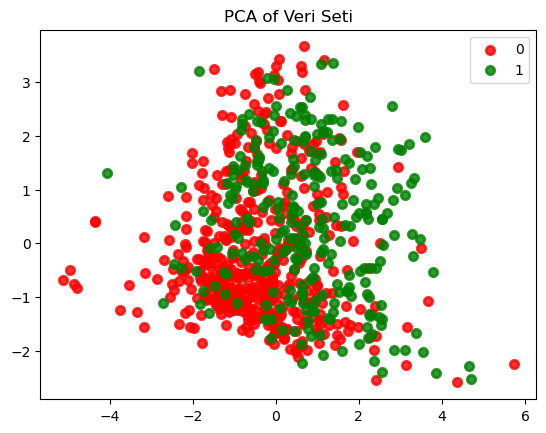

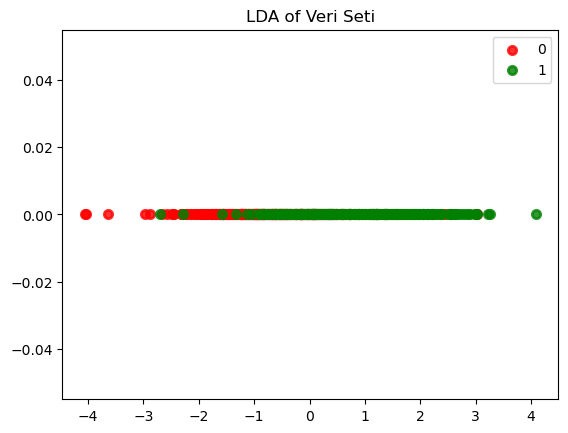

In [91]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis



# Verileri etiketlere ve özelliklere göre ayırdım
X = veri.drop('Class variable (0 or 1)', axis=1)  
y = veri['Class variable (0 or 1)']  

# Veri setini normalize ettim
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# PCA'yi uyguladım
pca = PCA(n_components=2)
X_r = pca.fit_transform(X_scaled)

# LDA'yı uyguladım
lda = LinearDiscriminantAnalysis(n_components=1)
X_r2 = lda.fit_transform(X_scaled, y)

plt.figure()
colors = ['red', 'green', 'blue']  # Sınıf renkleri
lw = 2  # Nokta kenar kalınlığı

# PCA görselleştirmesini yaptım
for color, target_name in zip(colors, set(y)):
    plt.scatter(X_r[y == target_name, 0], X_r[y == target_name, 1], color=color, alpha=0.8, lw=lw, label=target_name)
plt.legend(loc='best', shadow=False, scatterpoints=1)
plt.title('PCA of Veri Seti')
plt.figure()

# LDA görselleştirmesini yaptım
for color, target_name in zip(colors, set(y)):
    plt.scatter(X_r2[y == target_name, 0], [0]*len(X_r2[y == target_name]), color=color, alpha=0.8, lw=lw, label=target_name)
plt.legend(loc='best', shadow=False, scatterpoints=1)
plt.title('LDA of Veri Seti')

plt.show()


3. SORU :  
Veri setinizi rastgele olarak %70 eğitim %30 test olacak şekilde ayırınız. Eğitim veri seti için Çoklu Doğrusal Regresyon analizi ve Multinominal Lojistik Regresyon analizi yöntemlerini uygulayınız. Elde ettiğiniz katsayıları raporlayınız.  Elde ettiğiniz regresyon denklemlerini kullanarak Test kümesi için performans metriklerini hesaplayınız.

In [93]:
# Bağımlı ve bağımsız değişkenleri ayırdım
X = veri.drop('Class variable (0 or 1)', axis=1)
y = veri['Class variable (0 or 1)']

# Eğitim ve test veri setlerini ayırdım
X_egitim, X_test, y_egitim, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Çoklu Doğrusal Regresyon analizini uyguladım
dogrusal_regresyon_modeli = LinearRegression()
dogrusal_regresyon_modeli.fit(X_egitim, y_egitim)

# Elde edilen katsayıları raporladım
print("Çoklu Doğrusal Regresyon Modelinin Katsayıları:")
for i, katsayi in enumerate(dogrusal_regresyon_modeli.coef_):
    print(f"Katsayı {i+1}: {katsayi}")

# Multinominal Lojistik Regresyon analizini uyguladım
lojistik_regresyon_modeli = LogisticRegression(multi_class='multinomial')
lojistik_regresyon_modeli.fit(X_egitim, y_egitim)

# Performans metriklerini hesapladım
y_pred = lojistik_regresyon_modeli.predict(X_test)
dogruluk = accuracy_score(y_test, y_pred)
rapor = classification_report(y_test, y_pred)

print("\nMultinominal Lojistik Regresyon Modelinin Performansı:")
print(f"Doğruluk: {dogruluk}")
print("Sınıflandırma Raporu:\n", rapor)

Çoklu Doğrusal Regresyon Modelinin Katsayıları:
Katsayı 1: 0.00899394357459122
Katsayı 2: 0.005741608634515049
Katsayı 3: -0.0017111446952379691
Katsayı 4: -0.00025320834652632824
Katsayı 5: -0.00012649915169296502
Katsayı 6: 0.016173473593463394
Katsayı 7: 0.07290168577878509
Katsayı 8: 0.006264504815336457

Multinominal Lojistik Regresyon Modelinin Performansı:
Doğruluk: 0.7402597402597403
Sınıflandırma Raporu:
               precision    recall  f1-score   support

           0       0.80      0.80      0.80       151
           1       0.62      0.62      0.62        80

    accuracy                           0.74       231
   macro avg       0.71      0.71      0.71       231
weighted avg       0.74      0.74      0.74       231



c:\Users\esrab\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


4. SORU :  
Veri setinizi rastgele olarak %70 eğitim %30 test olacak şekilde ayırınız. Veri setinize karar ağaç sınıflandırma algoritmasını uygulayarak ağaç yapısını ve kestirim sonuçlarını veriniz. Test verisi için performans metriklerini hesaplayınız.



In [105]:
# Bağımsız değişkenler ve hedef değişkeni ayırdım
X = veri.drop(columns=['Class variable (0 or 1)'])
y = veri['Class variable (0 or 1)']

# Veriyi eğitim ve test setlerine ayırdım
X_egitim, X_test, y_egitim, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Karar ağacı sınıflandırma modelini oluşturdum ve eğittim
karar_agaci = DecisionTreeClassifier()
karar_agaci.fit(X_egitim, y_egitim)

# Ağaç yapısını görselleştirdim 
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

plt.figure(figsize=(150, 140))  # Daha büyük bir figür oluşturdum
plot_tree(karar_agaci, feature_names=X.columns.tolist(), class_names=['0', '1'], filled=True, fontsize=50)  # Metin boyutunu arttırdım
plt.show()



# Test verisi üzerinde tahmin yapttırdım
y_tahmin = karar_agaci.predict(X_test)

# Test verisi için performans metriklerini hesapladım
dogruluk = accuracy_score(y_test, y_tahmin)
print("Doğruluk:", dogruluk)

rapor = classification_report(y_test, y_tahmin)
print("Sınıflandırma Raporu:\n", rapor)

matris = confusion_matrix(y_test, y_tahmin)
print("Confusion Matrix:\n", matris)

Doğruluk: 0.7012987012987013
Sınıflandırma Raporu:
               precision    recall  f1-score   support

           0       0.80      0.72      0.76       151
           1       0.56      0.66      0.61        80

    accuracy                           0.70       231
   macro avg       0.68      0.69      0.68       231
weighted avg       0.72      0.70      0.71       231

Confusion Matrix:
 [[109  42]
 [ 27  53]]


5. SORU :  
Veri setinizi rastgele olarak %70 eğitim %30 test olacak şekilde ayırınız. Eğitim veri seti için Naive bayes sınıflandırıcısını uygulayınız. Elde ettiğiniz sonucları raporlayınız.  Test verisi için performans metriklerini hesaplayınız.

In [96]:
# Bağımlı ve bağımsız değişkenleri ayırdım
X = veri.drop('Class variable (0 or 1)', axis=1)
y = veri['Class variable (0 or 1)']

# Eğitim ve test veri setlerini ayırdım
X_egitim, X_test, y_egitim, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Naive Bayes sınıflandırıcısını oluşturdum
naive_bayes_modeli = GaussianNB()

# Eğitim veri seti üzerinde modeli eğittim
naive_bayes_modeli.fit(X_egitim, y_egitim)

# Test veri seti üzerinde modeli değerlendirdim
y_pred = naive_bayes_modeli.predict(X_test)

# Performans metriklerini hesapladım
dogruluk = accuracy_score(y_test, y_pred)
rapor = classification_report(y_test, y_pred)

# Sonuçları raporladım
print("Naive Bayes Sınıflandırıcısı Sonuçları:")
print("Doğruluk:", dogruluk)
print("Sınıflandırma Raporu:\n", rapor)

Naive Bayes Sınıflandırıcısı Sonuçları:
Doğruluk: 0.7445887445887446
Sınıflandırma Raporu:
               precision    recall  f1-score   support

           0       0.82      0.79      0.80       151
           1       0.62      0.66      0.64        80

    accuracy                           0.74       231
   macro avg       0.72      0.73      0.72       231
weighted avg       0.75      0.74      0.75       231



Sensitivity, Specificity ve Roc Curve eğirisini hesapladım.

Confusion Matrix:
 [[109  42]
 [ 27  53]]
Sensitivity: 0.7218543046357616
Specificity: 0.6625


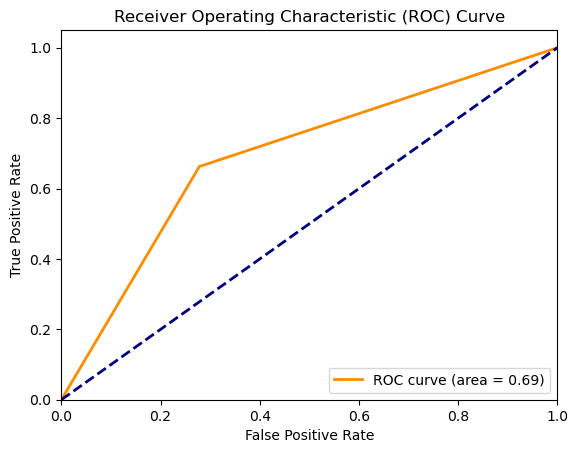

In [110]:
# Confusion Matrix (Konfüzyon Matrisi)
matris = confusion_matrix(y_test, y_tahmin)
print("Confusion Matrix:\n", matris)

# Sensitivity (Hassasiyet)
sensitivity = matris[0, 0] / (matris[0, 0] + matris[0, 1])
print("Sensitivity:", sensitivity)

# Specificity (Özgüllük)
specificity = matris[1, 1] / (matris[1, 0] + matris[1, 1])
print("Specificity:", specificity)

# ROC Curve (ROC Eğrisi)
fpr, tpr, thresholds = roc_curve(y_test, y_tahmin)
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()
